## Here I´m documenting some exercises using the book _Practical Statistics for Data Science_


## **Chapter 1: Exploratory Data Analysis**

Example 1: Location Estimates of Population and Murder Rates

In [14]:
# Creating data frame
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import wquantiles as wq
import statsmodels.api as sm

data = {
    'state' : ["Alabama","Alaska","Arizona","Arkansas","California","Colorado","Connecticut","Delaware"], 
    'population' : [4779736,710231,6392017,2915918,37253956,5029196,3574097,897934], 
    'murder_rate' : [5.7,5.6,4.7,5.6,4.4,2.8,2.4,5.8]
}

df = pd.DataFrame(data = data)

In [2]:
df.head(10)

,state,population,murder_rate
0,Alabama,4779736,5.7
1,Alaska,710231,5.6
2,Arizona,6392017,4.7
3,Arkansas,2915918,5.6
4,California,37253956,4.4
5,Colorado,5029196,2.8
6,Connecticut,3574097,2.4
7,Delaware,897934,5.8


df.info()

In [3]:
# Mean
print("Mean: ", df['population'].mean())

# Trimmed mean (trimmed mean avoids the outliers), removing 10% from each extreme
print("Trimmed mean: ", stats.trim_mean(df['population'], 0.1)) 

# Median (50th percentile)
print("Median: ", df['population'].median())

# Weighted mean 
print("Weighted mean: ", np.average(df["murder_rate"], weights = df["population"]))

# Weighted median
print("Weighted median", wq.median(df["murder_rate"], weights = df["population"]))

Mean:  7694135.625
Trimmed mean:  7694135.625
Median:  4176916.5
Weighted mean:  4.376359279149048
Weighted median 4.448750497554494


.

Example 2: Variability Estimates of State Population

In [6]:
pop = df['population']

# Standard deviation
print("Standard deviation: ", pop.std())

# IQR(interquartile range): 75th percentile - 25th percentile
print("IQR: ", pop.quantile(0.75) - pop.quantile(0.25))

# MAD (Median absolute deviation)
print("MAD: ", sm.robust.scale.mad(pop), "\n\n")

Standard deviation:  12105745.29585633
IQR:  2958479.25
MAD:  2576836.044572552 




Exploring Data Distribution

In [10]:
# Percentiles and Boxplot

print("Percentiles:\n",df['murder_rate'].quantile([0.05,0.25,0.5,0.75,0.95]))

Percentiles:
 0.05    2.540
0.25    4.000
0.50    5.150
0.75    5.625
0.95    5.765
Name: murder_rate, dtype: float64


Text(0, 0.5, 'Population (millions)')

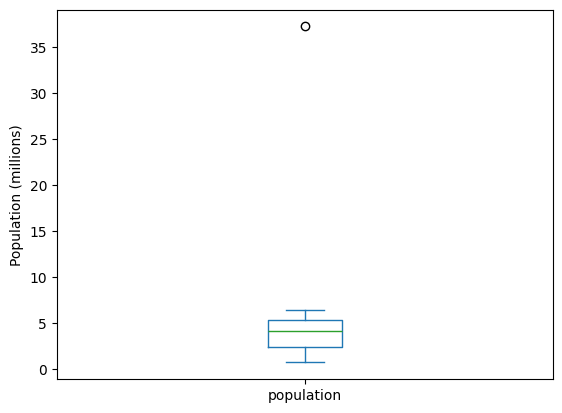

In [19]:
ax = (df['population']/1000000).plot.box()
ax.set_ylabel('Population (millions)')